
Jessica Gunther, Shreya Shrestha, Bhavesh Ahluwalia, Chris Balingcongan

CUS 635
Web Data Mining Project - Part 1





# Data cleaning and preprocessing

In [3]:
import pandas as pd
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

datafile = './drive/MyDrive/Web_Data_Mining/Deliverables/CombinedMedicalQuestions_NEW.csv'
data = pd.read_csv(datafile)

data

questions               domain
0                                     What are bruises?  accident, first aid
1                               How do I clean a wound?  accident, first aid
2               What should I keep in my first aid kit?  accident, first aid
3          How do I apply plasters and other dressings?  accident, first aid
4                             How do I apply a bandage?  accident, first aid
...                                                 ...                  ...
1148                        Can menopause affect sleep?       women's health
1149                  Can menopause affect my sex life?       women's health
1150  Do all menopausal women experience a decrease ...       women's health
1151            Will I still enjoy sex after menopause?       women's health
1152          Can menopause be a positive time of life?       women's health

[1153 rows x 2 columns]

## Tokenization & Stop Word Removal

In [5]:
#Remove Punctuations
data['questions'] = data['questions'].str.replace(r'[^\w\s]+', '')

In [6]:
#Tokenize list of questions and remove stopwords with NLTK  

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
nltk.download('stopwords')

#set stop words
stop_words = set(stopwords.words('english'))

#list to hold transformed questions
word_tokens = []

#loop through quesstions
for i in range(len(data)):
    tokens = word_tokenize(data['questions'][i].lower())
    filtered = [t for t in tokens if not t in stop_words]
    word_tokens.append(filtered)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
word_tokens

[['bruises'],
 ['clean', 'wound'],
 ['keep', 'first', 'aid', 'kit'],
 ['apply', 'plasters', 'dressings'],
 ['apply', 'bandage'],
 ['cut', 'need', 'stitches'],
 ['apply', 'butterfly', 'stitches'],
 ['care', 'stitches'],
 ['get', 'stitches', 'wet', 'bath', 'shower'],
 ['long', 'stitches', 'sutures', 'take', 'dissolve'],
 ['care', 'wound', 'treated', 'skin', 'glue'],
 ['take', 'temperature'],
 ['check', 'pulse'],
 ['check', 'someones', 'pulse'],
 ['know', 'ive', 'broken', 'bone'],
 ['care', 'plaster', 'cast'],
 ['dispose', 'used', 'needles', 'sharps'],
 ['injure', 'used', 'needle'],
 ['contact', 'someone', 'elses', 'blood', 'saliva'],
 ['someone', 'choking'],
 ['fly', 'surgery'],
 ['long', 'wear', 'compression', 'stockings', 'improve', 'circulation'],
 ['need', 'tetanus', 'jab', 'vaccine', 'accident', 'injury'],
 ['food', 'allergy'],
 ['symptoms', 'food', 'allergy'],
 ['food', 'allergies', 'diagnosed'],
 ['food', 'allergies', 'treated'],
 [],
 ['anal', 'cancer'],
 ['common', 'anal', 'canc

In [8]:
#put list of lists of tokens into one single list

flat_list = [item for sublist in word_tokens for item in sublist]
print(flat_list)

['bruises', 'clean', 'wound', 'keep', 'first', 'aid', 'kit', 'apply', 'plasters', 'dressings', 'apply', 'bandage', 'cut', 'need', 'stitches', 'apply', 'butterfly', 'stitches', 'care', 'stitches', 'get', 'stitches', 'wet', 'bath', 'shower', 'long', 'stitches', 'sutures', 'take', 'dissolve', 'care', 'wound', 'treated', 'skin', 'glue', 'take', 'temperature', 'check', 'pulse', 'check', 'someones', 'pulse', 'know', 'ive', 'broken', 'bone', 'care', 'plaster', 'cast', 'dispose', 'used', 'needles', 'sharps', 'injure', 'used', 'needle', 'contact', 'someone', 'elses', 'blood', 'saliva', 'someone', 'choking', 'fly', 'surgery', 'long', 'wear', 'compression', 'stockings', 'improve', 'circulation', 'need', 'tetanus', 'jab', 'vaccine', 'accident', 'injury', 'food', 'allergy', 'symptoms', 'food', 'allergy', 'food', 'allergies', 'diagnosed', 'food', 'allergies', 'treated', 'anal', 'cancer', 'common', 'anal', 'cancer', 'anal', 'cancer', 'affect', 'risk', 'factors', 'anal', 'cancer', 'causes', 'anal', 'c

## Lexical Diversity 

In [9]:
vocabulary={}

vocabulary=sorted(set(flat_list))
print(vocabulary)

['0', '10', '100', '19', '2', '2018', '2019', '20192020', '2019ncov', '247', '3', '33', '35', '3c', '40åc', '41', '5yearold', '6', '65', '7', '70', 'able', 'abnormal', 'abortion', 'abortive', 'abroad', 'absent', 'abuse', 'access', 'accident', 'accurate', 'ace2', 'acid', 'acne', 'acquired', 'action', 'activity', 'actual', 'acupuncture', 'acute', 'acyclovir', 'addicted', 'addiction', 'adhd', 'adjuvant', 'administration', 'adults', 'advanced', 'adverse', 'advice', 'affect', 'affected', 'african', 'age', 'agents', 'aid', 'air', 'alcohol', 'alcoholic', 'allergic', 'allergies', 'allergy', 'allow', 'alone', 'along', 'alopecia', 'alternative', 'alternatives', 'always', 'alzheimers', 'among', 'amount', 'amounts', 'anal', 'analgesics', 'andor', 'andparticipants', 'anemia', 'anesthesia', 'angiotensin', 'animal', 'animals', 'anosmia', 'another', 'antiasthmatic', 'antibiotics', 'antibodies', 'antibody', 'antidepressants', 'antiemetic', 'antigen', 'antihistamine', 'antimalaria', 'antiplatelet', 'ant

In [10]:
print(len(vocabulary))
print(len(flat_list))

1572
4799


In [11]:
def lexical_diversity(text):
    return len(data['questions'])*1.0/len(set(flat_list))

lexDiversity = {}
lexDiversity = lexical_diversity(flat_list)
print(lexDiversity)

0.7334605597964376


## Counting Word Instances

In [12]:
count = {}
for token in flat_list:
    count[token]=flat_list.count(token)
print(count)

{'bruises': 1, 'clean': 2, 'wound': 2, 'keep': 4, 'first': 3, 'aid': 1, 'kit': 2, 'apply': 3, 'plasters': 1, 'dressings': 1, 'bandage': 1, 'cut': 2, 'need': 20, 'stitches': 5, 'butterfly': 1, 'care': 22, 'get': 57, 'wet': 1, 'bath': 2, 'shower': 2, 'long': 26, 'sutures': 1, 'take': 25, 'dissolve': 1, 'treated': 29, 'skin': 1, 'glue': 1, 'temperature': 4, 'check': 4, 'pulse': 2, 'someones': 1, 'know': 8, 'ive': 6, 'broken': 1, 'bone': 2, 'plaster': 2, 'cast': 2, 'dispose': 2, 'used': 11, 'needles': 1, 'sharps': 1, 'injure': 1, 'needle': 1, 'contact': 8, 'someone': 18, 'elses': 4, 'blood': 12, 'saliva': 1, 'choking': 1, 'fly': 5, 'surgery': 8, 'wear': 5, 'compression': 2, 'stockings': 2, 'improve': 3, 'circulation': 1, 'tetanus': 1, 'jab': 1, 'vaccine': 30, 'accident': 1, 'injury': 3, 'food': 9, 'allergy': 3, 'symptoms': 56, 'allergies': 2, 'diagnosed': 35, 'anal': 15, 'cancer': 27, 'common': 30, 'affect': 17, 'risk': 28, 'factors': 9, 'causes': 48, 'treatments': 10, 'complications': 8, 

## Frequency Distribution

In [13]:
from nltk.probability import FreqDist
def get_most_frequent(freq, n):
    result = {}
    index = 0
    for i in sorted(freq, key=freq.get, reverse=True):
        index+=1
        result[i] = freq[i]
        if index==n: 
            break
    return result

fd = FreqDist(flat_list)

#Top 10 most frequent terms in ARTS and SPORTS
top10 = get_most_frequent(fd,10)

print(top10)

{'covid19': 111, 'get': 57, 'symptoms': 56, 'flu': 55, 'causes': 48, 'diagnosed': 35, 'people': 35, 'virus': 33, 'pregnancy': 33, 'coronavirus': 31}


## Finding Important Words attempt- Bhavesh

In [14]:
freq = nltk.FreqDist(flat_list) # to check the Frequency of each
print(" ")
for key,val in freq.items(): #to see all the words with the frequency 
    print ("% s : % d" %(key, val)) 

 
bruises :  1
clean :  2
wound :  2
keep :  4
first :  3
aid :  1
kit :  2
apply :  3
plasters :  1
dressings :  1
bandage :  1
cut :  2
need :  20
stitches :  5
butterfly :  1
care :  22
get :  57
wet :  1
bath :  2
shower :  2
long :  26
sutures :  1
take :  25
dissolve :  1
treated :  29
skin :  1
glue :  1
temperature :  4
check :  4
pulse :  2
someones :  1
know :  8
ive :  6
broken :  1
bone :  2
plaster :  2
cast :  2
dispose :  2
used :  11
needles :  1
sharps :  1
injure :  1
needle :  1
contact :  8
someone :  18
elses :  4
blood :  12
saliva :  1
choking :  1
fly :  5
surgery :  8
wear :  5
compression :  2
stockings :  2
improve :  3
circulation :  1
tetanus :  1
jab :  1
vaccine :  30
accident :  1
injury :  3
food :  9
allergy :  3
symptoms :  56
allergies :  2
diagnosed :  35
anal :  15
cancer :  27
common :  30
affect :  17
risk :  28
factors :  9
causes :  48
treatments :  10
complications :  8
side :  6
effects :  12
treatment :  21
prevent :  23
prognosis :  5
outlo

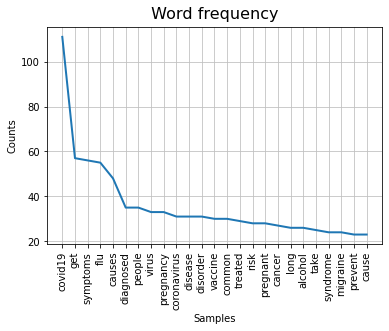

In [15]:
 import matplotlib.pyplot as plt
#Display graph.
freq = nltk.FreqDist(flat_list)
plt.title(" Word frequency ", y=1.01, fontsize=16)
plt.xlabel('important words')
freq.plot(25, cumulative=False)

In [16]:
print(len(fd.hapaxes()))
fd.hapaxes()

951


['bruises',
 'aid',
 'plasters',
 'dressings',
 'bandage',
 'butterfly',
 'wet',
 'sutures',
 'dissolve',
 'skin',
 'glue',
 'someones',
 'broken',
 'needles',
 'sharps',
 'injure',
 'needle',
 'saliva',
 'choking',
 'circulation',
 'tetanus',
 'jab',
 'accident',
 'staging',
 'ends',
 'marrow',
 'trials',
 'seeing',
 'date',
 'speak',
 'pick',
 'carry',
 'mothers',
 'intolerant',
 'cows',
 'salt',
 'vaccinations',
 '7',
 '10',
 'old',
 'buy',
 'multiple',
 'substances',
 'cranberry',
 'apple',
 'cider',
 'vinegar',
 'lemon',
 'oxalate',
 'things',
 'soda',
 'fissures',
 'hemorrhoidtype',
 'providers',
 'action',
 'ethnic',
 'groups',
 'harder',
 'hit',
 'selfisolate',
 'isolate',
 'around',
 'given',
 'approval',
 'latestage',
 'hospitalization',
 'manage',
 'pets',
 'overreaction',
 'coronaviridae',
 'flioviridae',
 'exactly',
 'neutralize',
 'environmental',
 'ncbi',
 'database',
 'submitted',
 '2018',
 'lipidcoated',
 'mrnabased',
 'transported',
 'cells',
 'diameter',
 '33',
 'cla

## Lemmatization & Stemming

In [17]:
nltk.download('wordnet')

dataset_final={}

def apply_stemming(corpus):
    stemmer = nltk.PorterStemmer()
    normalized_corpus = [stemmer.stem(token) for token in corpus]
    return normalized_corpus

def apply_lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

dataset_final = apply_lemmatization(flat_list)
print(dataset_final)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['bruise', 'clean', 'wound', 'keep', 'first', 'aid', 'kit', 'apply', 'plaster', 'dressing', 'apply', 'bandage', 'cut', 'need', 'stitch', 'apply', 'butterfly', 'stitch', 'care', 'stitch', 'get', 'stitch', 'wet', 'bath', 'shower', 'long', 'stitch', 'suture', 'take', 'dissolve', 'care', 'wound', 'treated', 'skin', 'glue', 'take', 'temperature', 'check', 'pulse', 'check', 'someone', 'pulse', 'know', 'ive', 'broken', 'bone', 'care', 'plaster', 'cast', 'dispose', 'used', 'needle', 'sharp', 'injure', 'used', 'needle', 'contact', 'someone', 'el', 'blood', 'saliva', 'someone', 'choking', 'fly', 'surgery', 'long', 'wear', 'compression', 'stocking', 'improve', 'circulation', 'need', 'tetanus', 'jab', 'vaccine', 'accident', 'injury', 'food', 'allergy', 'symptom', 'food', 'allergy', 'food', 'allergy', 'diagnosed', 'food', 'allergy', 'treated', 'anal', 'cancer', 'common', 'anal', 'cancer', 'ana

In [18]:
print(len(dataset_final))
print(len(flat_list))

4799
4799


In [19]:
dataset_final = apply_stemming(flat_list)
print(dataset_final)

['bruis', 'clean', 'wound', 'keep', 'first', 'aid', 'kit', 'appli', 'plaster', 'dress', 'appli', 'bandag', 'cut', 'need', 'stitch', 'appli', 'butterfli', 'stitch', 'care', 'stitch', 'get', 'stitch', 'wet', 'bath', 'shower', 'long', 'stitch', 'sutur', 'take', 'dissolv', 'care', 'wound', 'treat', 'skin', 'glue', 'take', 'temperatur', 'check', 'puls', 'check', 'someon', 'puls', 'know', 'ive', 'broken', 'bone', 'care', 'plaster', 'cast', 'dispos', 'use', 'needl', 'sharp', 'injur', 'use', 'needl', 'contact', 'someon', 'els', 'blood', 'saliva', 'someon', 'choke', 'fli', 'surgeri', 'long', 'wear', 'compress', 'stock', 'improv', 'circul', 'need', 'tetanu', 'jab', 'vaccin', 'accid', 'injuri', 'food', 'allergi', 'symptom', 'food', 'allergi', 'food', 'allergi', 'diagnos', 'food', 'allergi', 'treat', 'anal', 'cancer', 'common', 'anal', 'cancer', 'anal', 'cancer', 'affect', 'risk', 'factor', 'anal', 'cancer', 'caus', 'anal', 'cancer', 'symptom', 'anal', 'cancer', 'anal', 'cancer', 'diagnos', 'treat

In [20]:
print(len(dataset_final))

4799


## Collocations

In [21]:
dataset_final = nltk.Text(dataset_final)
dataset_final.collocations()

kidney stone; healthcar provid; brain tumor; femal infertil; alcohol
intoler; flu vaccin; anal cancer; alopecia areata; alcohol
cardiomyopathi; substanc use; vitamin defici; genet mutat; question
ask; optic nerv; outlook peopl; abnorm menstruat; eat disord;
influenza flu; side effect; give birth


## N-grams

In [22]:
from nltk.collocations import *
from nltk.util import ngrams

print('Generating bigrams')
bigrams = ngrams(dataset_final,2)
for bigram in bigrams:
    print(bigram)

Generating bigrams
('bruis', 'clean')
('clean', 'wound')
('wound', 'keep')
('keep', 'first')
('first', 'aid')
('aid', 'kit')
('kit', 'appli')
('appli', 'plaster')
('plaster', 'dress')
('dress', 'appli')
('appli', 'bandag')
('bandag', 'cut')
('cut', 'need')
('need', 'stitch')
('stitch', 'appli')
('appli', 'butterfli')
('butterfli', 'stitch')
('stitch', 'care')
('care', 'stitch')
('stitch', 'get')
('get', 'stitch')
('stitch', 'wet')
('wet', 'bath')
('bath', 'shower')
('shower', 'long')
('long', 'stitch')
('stitch', 'sutur')
('sutur', 'take')
('take', 'dissolv')
('dissolv', 'care')
('care', 'wound')
('wound', 'treat')
('treat', 'skin')
('skin', 'glue')
('glue', 'take')
('take', 'temperatur')
('temperatur', 'check')
('check', 'puls')
('puls', 'check')
('check', 'someon')
('someon', 'puls')
('puls', 'know')
('know', 'ive')
('ive', 'broken')
('broken', 'bone')
('bone', 'care')
('care', 'plaster')
('plaster', 'cast')
('cast', 'dispos')
('dispos', 'use')
('use', 'needl')
('needl', 'sharp')
('s

In [ ]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

In [ ]:
print('Finding frequent 2-grams')
finder = BigramCollocationFinder.from_words(dataset_final)
finder.apply_freq_filter(5)
tokens = finder.nbest(bigram.pmi, 20)
print(tokens)

Finding frequent 2-grams
[('optic', 'nerv'), ('alopecia', 'areata'), ('abnorm', 'menstruat'), ('give', 'birth'), ('question', 'ask'), ('femal', 'infertil'), ('prognosi', 'outlook'), ('brain', 'tumor'), ('menstruat', 'period'), ('healthcar', 'provid'), ('kidney', 'stone'), ('vitamin', 'defici'), ('genet', 'mutat'), ('side', 'effect'), ('ask', 'doctor'), ('autism', 'spectrum'), ('someon', 'els'), ('anal', 'cancer'), ('hospic', 'care'), ('alcohol', 'cardiomyopathi')]


## Finding Frequent 3-grams

In [ ]:
print('Finding frequent 3-grams')
finder = TrigramCollocationFinder.from_words(dataset_final)
finder.apply_freq_filter(5)
tokens = finder.nbest(trigram.pmi, 20)
print(tokens)

Finding frequent 3-grams
[('abnorm', 'menstruat', 'period'), ('question', 'ask', 'doctor'), ('autism', 'spectrum', 'disord'), ('substanc', 'use', 'disord'), ('genet', 'mutat', 'caus'), ('viru', 'caus', 'covid19')]


## **LDA attempt 1** 

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#make a copy of the original dataframe so it's not corrupted

data_lda = data.copy()
data_lda

questions               domain
0                                      What are bruises  accident, first aid
1                                How do I clean a wound  accident, first aid
2                What should I keep in my first aid kit  accident, first aid
3           How do I apply plasters and other dressings  accident, first aid
4                              How do I apply a bandage  accident, first aid
...                                                 ...                  ...
1148                         Can menopause affect sleep       women's health
1149                   Can menopause affect my sex life       women's health
1150  Do all menopausal women experience a decrease ...       women's health
1151             Will I still enjoy sex after menopause       women's health
1152           Can menopause be a positive time of life       women's health

[1153 rows x 2 columns]

In [ ]:
#preprocess questions for LDA

import string

#remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data_lda['lower'] = data_lda['questions'].str.lower().apply(remove_punctuations)
data_lda

questions  ...                                              lower
0                                      What are bruises  ...                                   what are bruises
1                                How do I clean a wound  ...                             how do i clean a wound
2                What should I keep in my first aid kit  ...             what should i keep in my first aid kit
3           How do I apply plasters and other dressings  ...        how do i apply plasters and other dressings
4                              How do I apply a bandage  ...                           how do i apply a bandage
...                                                 ...  ...                                                ...
1148                         Can menopause affect sleep  ...                         can menopause affect sleep
1149                   Can menopause affect my sex life  ...                   can menopause affect my sex life
1150  Do all menopausal women experience a decrease ...  ...  do all menopausal women experience a decrease ...
1151             Will I still enjoy sex after menopause  ...             will i still enjoy sex after menopause
1152           Can menopause be a positive time of life  ...           can menopause be a positive time of life

[1153 rows x 3 columns]

In [ ]:
#set stop words
stop_words = set(stopwords.words('english'))

#list to hold transformed questions
word_tokens = []

#loop through quesstions
for i in range(len(data_lda)):
  tokens = word_tokenize(data_lda['lower'][i])
  filtered = [t for t in tokens if not t in stop_words]
  word_tokens.append(filtered)

data_lda['word_tokens'] = word_tokens
data_lda

questions  ...                                        word_tokens
0                                      What are bruises  ...                                          [bruises]
1                                How do I clean a wound  ...                                     [clean, wound]
2                What should I keep in my first aid kit  ...                            [keep, first, aid, kit]
3           How do I apply plasters and other dressings  ...                       [apply, plasters, dressings]
4                              How do I apply a bandage  ...                                   [apply, bandage]
...                                                 ...  ...                                                ...
1148                         Can menopause affect sleep  ...                         [menopause, affect, sleep]
1149                   Can menopause affect my sex life  ...                     [menopause, affect, sex, life]
1150  Do all menopausal women experience a decrease ...  ...  [menopausal, women, experience, decrease, sexu...
1151             Will I still enjoy sex after menopause  ...                     [still, enjoy, sex, menopause]
1152           Can menopause be a positive time of life  ...                  [menopause, positive, time, life]

[1153 rows x 4 columns]

In [ ]:
#lemmatize words

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

data_lda['lemma'] = data_lda['word_tokens'].apply(lemmatize_text)
data_lda

questions  ...                                              lemma
0                                      What are bruises  ...                                           [bruise]
1                                How do I clean a wound  ...                                     [clean, wound]
2                What should I keep in my first aid kit  ...                            [keep, first, aid, kit]
3           How do I apply plasters and other dressings  ...                         [apply, plaster, dressing]
4                              How do I apply a bandage  ...                                   [apply, bandage]
...                                                 ...  ...                                                ...
1148                         Can menopause affect sleep  ...                         [menopause, affect, sleep]
1149                   Can menopause affect my sex life  ...                     [menopause, affect, sex, life]
1150  Do all menopausal women experience a decrease ...  ...  [menopausal, woman, experience, decrease, sexu...
1151             Will I still enjoy sex after menopause  ...                     [still, enjoy, sex, menopause]
1152           Can menopause be a positive time of life  ...                  [menopause, positive, time, life]

[1153 rows x 5 columns]

In [ ]:
dictionary = gensim.corpora.Dictionary(data_lda['lemma'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 bruise
1 clean
2 wound
3 aid
4 first
5 keep
6 kit
7 apply
8 dressing
9 plaster
10 bandage


In [ ]:
#filter out tokens that appear in < 15 documents, > 50% of documents and keep only first 100000
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data_lda['lemma']]
bow_corpus[100]

bow_doc_100 = bow_corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], 
bow_doc_100[i][1]))

Word 30 ("kidney") appears 1 time.
Word 31 ("stone") appears 1 time.


In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=7, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.121*"risk" + 0.096*"coronavirus" + 0.081*"disorder" + 0.078*"alcohol" + 0.074*"menopause" + 0.073*"use" + 0.060*"affect" + 0.049*"pregnancy" + 0.046*"brain" + 0.040*"treatment"
Topic: 1 
Words: 0.131*"migraine" + 0.112*"diagnosed" + 0.079*"autism" + 0.079*"stone" + 0.079*"kidney" + 0.075*"long" + 0.073*"take" + 0.047*"leukemia" + 0.044*"common" + 0.037*"disorder"
Topic: 2 
Words: 0.210*"symptom" + 0.099*"cancer" + 0.082*"common" + 0.062*"type" + 0.056*"treated" + 0.052*"treatment" + 0.051*"anal" + 0.045*"covid19" + 0.036*"acne" + 0.034*"cause"
Topic: 3 
Words: 0.146*"disease" + 0.114*"pregnant" + 0.083*"need" + 0.070*"syndrome" + 0.058*"period" + 0.054*"sarscov2" + 0.053*"safe" + 0.044*"get" + 0.037*"thyroid" + 0.029*"vitamin"
Topic: 4 
Words: 0.221*"covid19" + 0.128*"get" + 0.064*"headache" + 0.062*"test" + 0.060*"pregnancy" + 0.049*"prevent" + 0.047*"vitamin" + 0.041*"sex" + 0.038*"spread" + 0.038*"healthcare"
Topic: 5 
Words: 0.135*"virus" + 0.087*"care" + 0.082*"

In [ ]:
lda_model.print_topics(num_words = 10)

[(0,
  '0.121*"risk" + 0.096*"coronavirus" + 0.081*"disorder" + 0.078*"alcohol" + 0.074*"menopause" + 0.073*"use" + 0.060*"affect" + 0.049*"pregnancy" + 0.046*"brain" + 0.040*"treatment"'),
 (1,
  '0.131*"migraine" + 0.112*"diagnosed" + 0.079*"autism" + 0.079*"stone" + 0.079*"kidney" + 0.075*"long" + 0.073*"take" + 0.047*"leukemia" + 0.044*"common" + 0.037*"disorder"'),
 (2,
  '0.210*"symptom" + 0.099*"cancer" + 0.082*"common" + 0.062*"type" + 0.056*"treated" + 0.052*"treatment" + 0.051*"anal" + 0.045*"covid19" + 0.036*"acne" + 0.034*"cause"'),
 (3,
  '0.146*"disease" + 0.114*"pregnant" + 0.083*"need" + 0.070*"syndrome" + 0.058*"period" + 0.054*"sarscov2" + 0.053*"safe" + 0.044*"get" + 0.037*"thyroid" + 0.029*"vitamin"'),
 (4,
  '0.221*"covid19" + 0.128*"get" + 0.064*"headache" + 0.062*"test" + 0.060*"pregnancy" + 0.049*"prevent" + 0.047*"vitamin" + 0.041*"sex" + 0.038*"spread" + 0.038*"healthcare"'),
 (5,
  '0.135*"virus" + 0.087*"care" + 0.082*"get" + 0.081*"chickenpox" + 0.078*"some

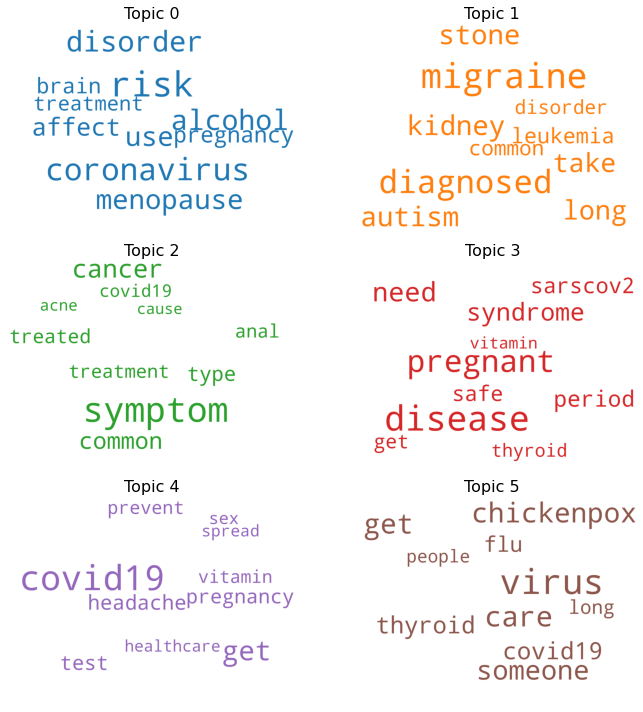

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### LDA attempt 2 

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 3.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 268kB/s 
     |████████████████████████████████| 9.9MB 34.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=a8c4e0489bf65f7fde986341fad34dfa3ebfbd73a7c5f6d1aa36d1d079313c1b
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
import re
from pprint import pprint

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
data_lda

questions  ...                                              lemma
0                                      What are bruises  ...                                           [bruise]
1                                How do I clean a wound  ...                                     [clean, wound]
2                What should I keep in my first aid kit  ...                            [keep, first, aid, kit]
3           How do I apply plasters and other dressings  ...                         [apply, plaster, dressing]
4                              How do I apply a bandage  ...                                   [apply, bandage]
...                                                 ...  ...                                                ...
1148                         Can menopause affect sleep  ...                         [menopause, affect, sleep]
1149                   Can menopause affect my sex life  ...                     [menopause, affect, sex, life]
1150  Do all menopausal women experience a decrease ...  ...  [menopausal, woman, experience, decrease, sexu...
1151             Will I still enjoy sex after menopause  ...                     [still, enjoy, sex, menopause]
1152           Can menopause be a positive time of life  ...                  [menopause, positive, time, life]

[1153 rows x 5 columns]

In [ ]:
#take lowercase questions from data_lda and turn to a list
data_lda2 = data_lda.lower.values.tolist()

#tokenize lower cased questions
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data_lda2))

print(data_words[:3])

[['what', 'are', 'bruises'], ['how', 'do', 'clean', 'wound'], ['what', 'should', 'keep', 'in', 'my', 'first', 'aid', 'kit']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
trigram_mod

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
import spacy

# Define functions for stopwords, bigrams, trigrams and lemmatization (below 2 cells code from: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['bruise']]


In [ ]:
print(data_lemmatized[4])

['apply']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[4])

[(5, 1)]


In [ ]:
id2word[0]

'bruise'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('bruise', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"common" + 0.046*"woman" + 0.044*"depression" + 0.039*"normal" + '
  '0.038*"baby" + 0.032*"life" + 0.018*"part" + 0.017*"hair" + 0.017*"trigger" '
  '+ 0.016*"man"'),
 (1,
  '0.052*"test" + 0.047*"use" + 0.034*"follow" + 0.034*"heart" + '
  '0.033*"sexual" + 0.031*"need" + 0.031*"change" + 0.027*"see" + '
  '0.022*"happen" + 0.022*"positive"'),
 (2,
  '0.100*"period" + 0.054*"long" + 0.039*"health" + 0.032*"exercise" + '
  '0.028*"feel" + 0.023*"surgery" + 0.021*"syndrome" + 0.019*"consider" + '
  '0.018*"fly" + 0.016*"change"'),
 (3,
  '0.104*"menopause" + 0.097*"disorder" + 0.067*"affect" + 0.046*"flu" + '
  '0.039*"time" + 0.023*"help" + 0.019*"occur" + 0.019*"bipolar" + '
  '0.019*"substance_use" + 0.017*"go"'),
 (4,
  '0.132*"pregnancy" + 0.049*"treatment" + 0.031*"effect" + 0.030*"bleed" + '
  '0.027*"blood" + 0.018*"decrease" + 0.018*"control" + 0.014*"else" + '
  '0.013*"food" + 0.013*"caffeine"'),
 (5,
  '0.091*"treat" + 0.048*"vaccine" + 0.041*"disease" + '
  '

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.472257052116304

Coherence Score:  0.6574774022160949


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

ImportError: ignored

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Finding the optimal number of topics


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=60, step=3)

In [ ]:
model_list

In [ ]:
coherence_values

[0.6369980916713069,
 0.6417339966837237,
 0.6308652358975622,
 0.6405085427351005,
 0.6453834446389702,
 0.648221395079763,
 0.6521153609437349,
 0.6525666279321491,
 0.6511576224332524,
 0.6575264930838887,
 0.6485554894248138,
 0.6600324182651527,
 0.6587060087843833,
 0.6543201473805893,
 0.6592561746846802,
 0.6402800761910623,
 0.6503804196900418,
 0.6539404983944247,
 0.6467471798331926,
 0.6480844346269367]

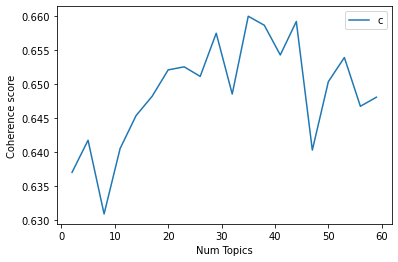

In [ ]:
# Show graph
limit=60; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.637
Num Topics = 5  has Coherence Value of 0.6417
Num Topics = 8  has Coherence Value of 0.6309
Num Topics = 11  has Coherence Value of 0.6405
Num Topics = 14  has Coherence Value of 0.6454
Num Topics = 17  has Coherence Value of 0.6482
Num Topics = 20  has Coherence Value of 0.6521
Num Topics = 23  has Coherence Value of 0.6526
Num Topics = 26  has Coherence Value of 0.6512
Num Topics = 29  has Coherence Value of 0.6575
Num Topics = 32  has Coherence Value of 0.6486
Num Topics = 35  has Coherence Value of 0.66
Num Topics = 38  has Coherence Value of 0.6587
Num Topics = 41  has Coherence Value of 0.6543
Num Topics = 44  has Coherence Value of 0.6593
Num Topics = 47  has Coherence Value of 0.6403
Num Topics = 50  has Coherence Value of 0.6504
Num Topics = 53  has Coherence Value of 0.6539
Num Topics = 56  has Coherence Value of 0.6467
Num Topics = 59  has Coherence Value of 0.6481


In [ ]:
#reproduce first LDA model, but with a k of 26

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           #random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.079*"symptom" + 0.060*"child" + 0.036*"common" + 0.028*"need" + '
  '0.024*"see" + 0.023*"much" + 0.018*"discharge" + 0.017*"call" + '
  '0.017*"occur" + 0.014*"vitamin"'),
 (1,
  '0.081*"pregnant" + 0.074*"risk" + 0.070*"sex" + 0.049*"safe" + 0.041*"get" '
  '+ 0.031*"care" + 0.031*"woman" + 0.025*"baby" + 0.015*"man" + '
  '0.013*"really"'),
 (2,
  '0.069*"diagnose" + 0.067*"affect" + 0.057*"eat" + 0.046*"prevent" + '
  '0.030*"drink" + 0.025*"know" + 0.023*"help" + 0.017*"really" + 0.017*"find" '
  '+ 0.016*"autism"'),
 (3,
  '0.098*"disorder" + 0.055*"people" + 0.047*"treatment" + 0.035*"sexual" + '
  '0.030*"start" + 0.025*"s" + 0.019*"syndrome" + 0.019*"bipolar" + '
  '0.019*"substance_use" + 0.014*"dysfunction"'),
 (4,
  '0.095*"pregnancy" + 0.079*"menopause" + 0.069*"cause" + 0.030*"time" + '
  '0.026*"health" + 0.025*"migraine" + 0.022*"effect" + 0.022*"period" + '
  '0.022*"bleed" + 0.013*"go"'),
 (5,
  '0.057*"take" + 0.055*"be" + 0.047*"test" + 0.044*"infection" +

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.393799846733698

Coherence Score:  0.6685897994475538


In [ ]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

ImportError: ignored

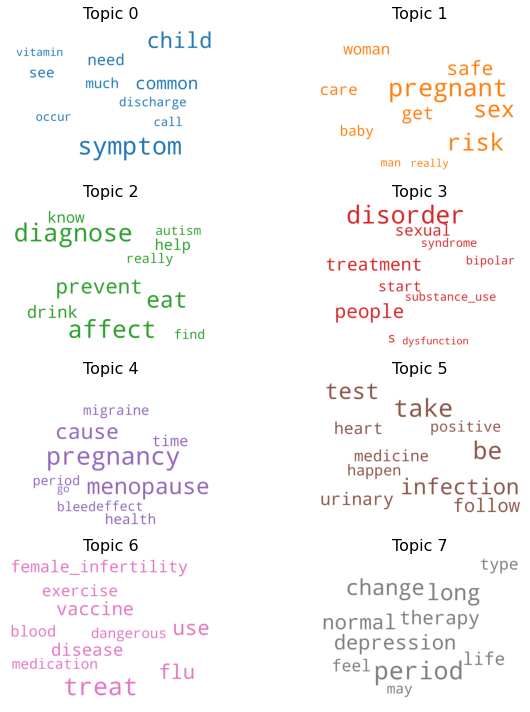

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
data_lda8 = data.copy()
data_lda8

topics = []
weights = []
words = []

for i in range(len(data_lda8)):
  topic = max(dict(lda_model[corpus[i]][0]), key = dict(lda_model[corpus[i]][0]).get)
  weight = dict(lda_model[corpus[i]][0]).get(topic)
  topics.append(topic)
  weights.append(weight)
  terms = lda_model.show_topic(topic)
  t = []
  for b in range(len(terms)):
    t.append(terms[b][0])
  words.append(t)

data_lda8['topic'] = topics
data_lda8['weight'] = weights
data_lda8['topic_terms'] = words
data_lda8.sort_values(by = 'weight', ascending=False )

questions  ...                                        topic_terms
298  Gyms nationawide are closed due to COVID19 Wha...  ...  [pregnant, risk, sex, safe, get, care, woman, ...
172  Why would a 2019nCoV protein sequence in the N...  ...  [treat, use, flu, vaccine, disease, female_inf...
910  What is the motivating operation that decrease...  ...  [pregnancy, menopause, cause, time, health, mi...
192  Are there any documented instances of coronavi...  ...  [treat, use, flu, vaccine, disease, female_inf...
290  A new paper suggests the Corona Virus has Unca...  ...  [treat, use, flu, vaccine, disease, female_inf...
..                                                 ...  ...                                                ...
680                      What is a migraine equivalent  ...  [treat, use, flu, vaccine, disease, female_inf...
681                          What is a hypnic headache  ...  [treat, use, flu, vaccine, disease, female_inf...
685                             What is SUNCT syndrome  ...  [treat, use, flu, vaccine, disease, female_inf...
686                         What is menstrual migraine  ...  [treat, use, flu, vaccine, disease, female_inf...
576                 What is GuillainBarré syndrome GBS  ...  [treat, use, flu, vaccine, disease, female_inf...

[1153 rows x 5 columns]

In [ ]:
data_lda8.sort_values(by = 'weight', ascending=False )

questions  ...                                        topic_terms
298  Gyms nationawide are closed due to COVID19 Wha...  ...  [pregnant, risk, sex, safe, get, care, woman, ...
172  Why would a 2019nCoV protein sequence in the N...  ...  [treat, use, flu, vaccine, disease, female_inf...
910  What is the motivating operation that decrease...  ...  [pregnancy, menopause, cause, time, health, mi...
192  Are there any documented instances of coronavi...  ...  [treat, use, flu, vaccine, disease, female_inf...
290  A new paper suggests the Corona Virus has Unca...  ...  [treat, use, flu, vaccine, disease, female_inf...
..                                                 ...  ...                                                ...
680                      What is a migraine equivalent  ...  [treat, use, flu, vaccine, disease, female_inf...
681                          What is a hypnic headache  ...  [treat, use, flu, vaccine, disease, female_inf...
685                             What is SUNCT syndrome  ...  [treat, use, flu, vaccine, disease, female_inf...
686                         What is menstrual migraine  ...  [treat, use, flu, vaccine, disease, female_inf...
576                 What is GuillainBarré syndrome GBS  ...  [treat, use, flu, vaccine, disease, female_inf...

[1153 rows x 5 columns]

In [ ]:
data_lda8.sort_values(by = 'topic')

questions  ...                                        topic_terms
349  Why is the disease being called coronavirus di...  ...  [symptom, child, common, need, see, much, disc...
123                          Who might get hemorrhoids  ...  [symptom, child, common, need, see, much, disc...
124                  What are the types of hemorrhoids  ...  [symptom, child, common, need, see, much, disc...
126                            What causes hemorrhoids  ...  [symptom, child, common, need, see, much, disc...
127               What are the symptoms of hemorrhoids  ...  [symptom, child, common, need, see, much, disc...
..                                                 ...  ...                                                ...
957  How long should I wear compression stockings a...  ...  [period, long, change, normal, depression, the...
181  Are all emerging viral diseases of the past 10...  ...  [period, long, change, normal, depression, the...
960  Do I need to change my diet after gallbladder ...  ...  [period, long, change, normal, depression, the...
342        How long is the incubation period for COVID  ...  [period, long, change, normal, depression, the...
422           How long will I have alcohol intolerance  ...  [period, long, change, normal, depression, the...

[1153 rows x 5 columns]

In [ ]:
pd.set_option('display.max_rows', None)
lda_8_topics = data_lda8.groupby('topic')['domain'].value_counts().to_frame()

In [ ]:
import plotly.express as px

fig = px.bar(data_lda8, x='topic', color="domain", title="Domain Count By Topic")
fig.show()

In [ ]:

lda_8_topics.columns = lda_8_topics.columns.get_level_values(0)
lda_8_topics.index

MultiIndex([(0,                         'diseases'),
            (0,                      'coronavirus'),
            (0,                        'condition'),
            (0,                        'pregnancy'),
            (0,                        'headaches'),
            (0,                 'digestive issues'),
            (0,                    'mental health'),
            (0,                    'miscellaneous'),
            (0,                           'cancer'),
            (0,                   'women's health'),
            ...
            (7,                       'infections'),
            (7,                        'lifestyle'),
            (7,                         'medicine'),
            (7, 'operations, tests and procedures'),
            (7,          'services and treatments'),
            (7,                           'cancer'),
            (7,                'children's health'),
            (7,                 'digestive issues'),
            (7,               

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=26, 
                                           #random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(24,
  '0.089*"blood" + 0.077*"happen" + 0.069*"possible" + 0.044*"record" + '
  '0.044*"else" + 0.037*"service" + 0.026*"vasodilator" + 0.019*"pressure" + '
  '0.019*"cough" + 0.017*"die"'),
 (0,
  '0.179*"infection" + 0.110*"urinary" + 0.086*"medicine" + 0.051*"catch" + '
  '0.022*"must" + 0.020*"prescription" + 0.020*"mrsa" + 0.019*"cold" + '
  '0.013*"current" + 0.013*"respiratory"'),
 (16,
  '0.047*"stop" + 0.043*"system" + 0.037*"transmission" + 0.037*"stretch" + '
  '0.037*"mark" + 0.035*"season" + 0.029*"function" + 0.022*"diagnosis" + '
  '0.021*"appear" + 0.020*"expect"'),
 (21,
  '0.095*"exercise" + 0.083*"know" + 0.037*"person" + 0.035*"floor" + '
  '0.035*"pelvic" + 0.027*"good" + 0.024*"have" + 0.023*"eye" + '
  '0.023*"operation" + 0.020*"paranoid"'),
 (25,
  '0.083*"virus" + 0.055*"food" + 0.053*"reduce" + 0.037*"body" + 0.036*"mean" '
  '+ 0.032*"weight" + 0.021*"cast" + 0.018*"death" + 0.018*"sample" + '
  '0.015*"blockage"'),
 (20,
  '0.091*"health" + 0.091*"sexual"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.602036052484956

Coherence Score:  0.5821619762843064


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

ImportError: ignored

In [ ]:
data_lda26 = data.copy()
data_lda26

topics = []
weights = []
words = []

for i in range(len(data_lda26)):
  topic = max(dict(lda_model[corpus[i]][0]), key = dict(lda_model[corpus[i]][0]).get)
  weight = dict(lda_model[corpus[i]][0]).get(topic)
  topics.append(topic)
  weights.append(weight)
  terms = lda_model.show_topic(topic)
  t = []
  for b in range(len(terms)):
    t.append(terms[b][0])
  words.append(t)

data_lda26['topic'] = topics
data_lda26['weight'] = weights
data_lda26['topic_terms'] = words
data_lda26.sort_values(by = 'weight', ascending=False )

In [ ]:
import plotly.express as px

fig = px.bar(data_lda26, x='topic', color="domain", title="Domain Count By Topic")
fig.show()

In [ ]:
#assign dominant topic to each question

topics = []
weights = []

for i in range(len(data)):
  topic = max(dict(lda_model[corpus[i]][0]), key = dict(lda_model[corpus[i]][0]).get)
  weight = dict(lda_model[corpus[i]][0]).get(topic)
  topics.append(topic)
  weights.append(weight)

data['topic'] = topics
data['weight'] = weights
data

## clustering 1st attempt -shreya

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

### **To make the copy of the dataset**

In [ ]:
copydf = data.copy()
copydf.head()

questions               domain
0                             What are bruises?  accident, first aid
1                       How do I clean a wound?  accident, first aid
2       What should I keep in my first aid kit?  accident, first aid
3  How do I apply plasters and other dressings?  accident, first aid
4                     How do I apply a bandage?  accident, first aid

### **To pre-process questions for clustering**

In [ ]:
import string

# to remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

copydf['lower'] = copydf['questions'].str.lower().apply(remove_punctuations)
copydf

questions  ...                                              lower
0                                     What are bruises?  ...                                   what are bruises
1                               How do I clean a wound?  ...                             how do i clean a wound
2               What should I keep in my first aid kit?  ...             what should i keep in my first aid kit
3          How do I apply plasters and other dressings?  ...        how do i apply plasters and other dressings
4                             How do I apply a bandage?  ...                           how do i apply a bandage
...                                                 ...  ...                                                ...
1148                        Can menopause affect sleep?  ...                         can menopause affect sleep
1149                  Can menopause affect my sex life?  ...                   can menopause affect my sex life
1150  Do all menopausal women experience a decrease ...  ...  do all menopausal women experience a decrease ...
1151            Will I still enjoy sex after menopause?  ...             will i still enjoy sex after menopause
1152          Can menopause be a positive time of life?  ...           can menopause be a positive time of life

[1153 rows x 3 columns]

### **To set stop words and create a list of tokens**

In [ ]:
#set stop words
stop_words = set(stopwords.words('english'))

#list to hold transformed questions
word_tokens = []

#loop through quesstions
for i in range(len(copydf)):
  tokens = word_tokenize(copydf['lower'][i])
  filtered = [t for t in tokens if not t in stop_words]
  word_tokens.append(filtered)

copydf['word_tokens'] = word_tokens
copydf.head()

questions  ...                   word_tokens
0                             What are bruises?  ...                     [bruises]
1                       How do I clean a wound?  ...                [clean, wound]
2       What should I keep in my first aid kit?  ...       [keep, first, aid, kit]
3  How do I apply plasters and other dressings?  ...  [apply, plasters, dressings]
4                     How do I apply a bandage?  ...              [apply, bandage]

[5 rows x 4 columns]

### **To remove punctuations, apply stopwording, apply stramming and lemmatize the text**

In [ ]:
def remove_punctuation(text):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_text = [token for token in text if (not token in punctuations)]
    return filtered_text

def apply_stopwording(text, min_len):
    filtered_text = [token for token in text if (not token in stopwords.words('english') and len(token)>min_len)]
    return filtered_text

def apply_stemming(text):
    stemmer = nltk.PorterStemmer()
    normalized_text = [stemmer.stem(token) for token in text]
    return normalized_text

def lemmatize_text(text):
    return [lemmatizer.lemmatize(token) for token in text]
    

clean_list= []
tokenized_list = []
index = 1
for i in word_tokens:
  index+=1
  tokens = i
  clean_text = apply_stemming(tokens)
  print ('[%s] - %s' % (index, clean_text))
  clean_list.append(clean_text)
  tokenized_list.append(tokens)

[2] - ['bruis']
[3] - ['clean', 'wound']
[4] - ['keep', 'first', 'aid', 'kit']
[5] - ['appli', 'plaster', 'dress']
[6] - ['appli', 'bandag']
[7] - ['cut', 'need', 'stitch']
[8] - ['appli', 'butterfli', 'stitch']
[9] - ['care', 'stitch']
[10] - ['get', 'stitch', 'wet', 'bath', 'shower']
[11] - ['long', 'stitch', 'sutur', 'take', 'dissolv']
[12] - ['care', 'wound', 'treat', 'skin', 'glue']
[13] - ['take', 'temperatur']
[14] - ['check', 'puls']
[15] - ['check', 'someon', 'puls']
[16] - ['know', 'ive', 'broken', 'bone']
[17] - ['care', 'plaster', 'cast']
[18] - ['dispos', 'use', 'needl', 'sharp']
[19] - ['injur', 'use', 'needl']
[20] - ['contact', 'someon', 'els', 'blood', 'saliva']
[21] - ['someon', 'choke']
[22] - ['fli', 'surgeri']
[23] - ['long', 'wear', 'compress', 'stock', 'improv', 'circul']
[24] - ['need', 'tetanu', 'jab', 'vaccin', 'accid', 'injuri']
[25] - ['food', 'allergi']
[26] - ['symptom', 'food', 'allergi']
[27] - ['food', 'allergi', 'diagnos']
[28] - ['food', 'allergi', 't

To create a Pandas Dataframe containing the tokens and their corresponding lemmas

In [ ]:
lemmas_list=[]
token_list=[]

lemmas_list.extend(l for lemma in clean_list for l in lemma)
token_list.extend(t for token in tokenized_list for t in token)

token_dataframe = pd.DataFrame({'terms': token_list}, index = lemmas_list)
print(token_dataframe.head(50))

                  terms
bruis           bruises
clean             clean
wound             wound
keep               keep
first             first
aid                 aid
kit                 kit
appli             apply
plaster        plasters
dress         dressings
appli             apply
bandag          bandage
cut                 cut
need               need
stitch         stitches
appli             apply
butterfli     butterfly
stitch         stitches
care               care
stitch         stitches
get                 get
stitch         stitches
wet                 wet
bath               bath
shower           shower
long               long
stitch         stitches
sutur           sutures
take               take
dissolv        dissolve
care               care
wound             wound
treat           treated
skin               skin
glue               glue
take               take
temperatur  temperature
check             check
puls              pulse
check             check
someon         s

### **Generate Tf-IDF measures**

In [ ]:
token_dataframe.head()

terms
bruis  bruises
clean    clean
wound    wound
keep      keep
first    first

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

terms=[str(set(token)) for token in clean_list]

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(terms)

print(tfidf_matrix.shape)

(1153, 1253)


### **To get the features**

In [ ]:
features = tfidf_vectorizer.get_feature_names()
print(features)

['10', '100', '19', '2018', '2019', '20192020', '2019ncov', '247', '33', '35', '3c', '40å', '41', '5yearold', '65', '70', 'abl', 'abnorm', 'abort', 'abroad', 'absent', 'abus', 'access', 'accid', 'accur', 'ace2', 'acid', 'acn', 'acquir', 'action', 'activ', 'actual', 'acupunctur', 'acut', 'acyclovir', 'addict', 'adhd', 'adjuv', 'administr', 'adult', 'advanc', 'advers', 'advic', 'affect', 'african', 'age', 'agent', 'aid', 'air', 'alcohol', 'allerg', 'allergi', 'allow', 'alon', 'alopecia', 'altern', 'alway', 'alzheim', 'anal', 'analges', 'andor', 'andparticip', 'anemia', 'anesthesia', 'angiotensin', 'anim', 'anosmia', 'anoth', 'antiasthmat', 'antibiot', 'antibodi', 'antidepress', 'antiemet', 'antigen', 'antihistamin', 'antimalaria', 'antiplatelet', 'antivir', 'anxieti', 'anyth', 'aortic', 'appear', 'appl', 'appli', 'appoint', 'approach', 'approv', 'arb', 'area', 'areacountri', 'areata', 'arrang', 'arter', 'arteri', 'artifici', 'asd', 'asian', 'ask', 'aspirin', 'assay', 'assess', 'assign', 

### **1st attempt on elbow curve**

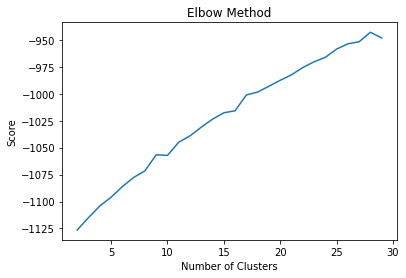

In [ ]:
from sklearn.cluster import KMeans

number_clusters = range(2,30)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans


score = [kmeans[i].fit(tfidf_matrix).score(tfidf_matrix) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()


### 2nd attempt on elbow method

In [ ]:
model = KMeans(n_clusters= 29)
model.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=29, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
sum_of_squared_ditances = []
k = range(2,30)
for i in k:
  kmeans1 = KMeans(n_clusters=i)
  kmeans1 = kmeans1.fit(tfidf_matrix)
  sum_of_squared_ditances.append(kmeans1.inertia_)

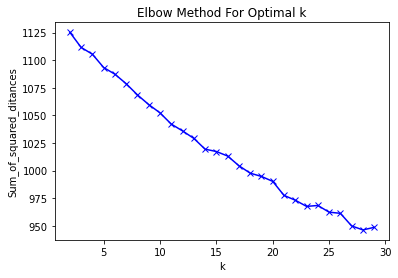

In [ ]:
plt.plot(k, sum_of_squared_ditances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_ditances')
plt.title('Elbow Method For Optimal k')
plt.show()

### **To create the k-means clusters using the optimal k**

In [ ]:
from sklearn.cluster import KMeans

k = 14
k_means = KMeans(n_clusters=k)
%time k_means.fit(tfidf_matrix)

CPU times: user 1.64 s, sys: 1.29 s, total: 2.93 s
Wall time: 1.53 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### **Using Pandas dataframe to easily analyze the clustering solution.**

In [ ]:
clusters = k_means.labels_.tolist()
list_space = {'term':terms, 'cluster':clusters}
kmean_dataframe = pd.DataFrame(list_space,index=[clusters], columns =['term','cluster'])

In [ ]:
kmean_dataframe.head(10)

term  cluster
10                                       {'bruis'}       10
10                              {'wound', 'clean'}       10
10                 {'first', 'aid', 'kit', 'keep'}       10
10                   {'dress', 'plaster', 'appli'}       10
10                             {'bandag', 'appli'}       10
8                        {'cut', 'stitch', 'need'}        8
10                {'butterfli', 'stitch', 'appli'}       10
10                              {'care', 'stitch'}       10
10      {'get', 'shower', 'bath', 'wet', 'stitch'}       10
8   {'long', 'take', 'dissolv', 'sutur', 'stitch'}        8

### **Number of elements per cluster**

In [ ]:

kmean_dataframe['cluster'].value_counts()

10    594
8     116
3      56
9      55
5      45
4      45
2      45
0      45
11     35
7      29
6      27
1      27
12     21
13     13
Name: cluster, dtype: int64

### **Top terms in each cluster**

In [ ]:
n = 10

print('Top %s terms within clusters' % n)
print()

sorted_centroids = k_means.cluster_centers_.argsort()[:, ::-1]

for cluster_number in range(k):
    token_string = ''
    
    for ind in sorted_centroids[cluster_number, :n]:
        token_string = token_string + token_dataframe.loc[features[ind].split(' ')].values.tolist()[0][0] + ', '
    
    print("Cluster %d: %s" % (cluster_number, token_string))

Top 10 terms within clusters

Cluster 0: disorders, eat, substances, used, bipolar, treatments, pregnancy, diagnosed, deal, symptoms, 
Cluster 1: prevent, headaches, covid19, marks, stretch, therapies, way, help, effects, rabies, 
Cluster 2: symptoms, covid19, causes, diabetes, infected, mellitus, signs, alopecia, areata, alcohol, 
Cluster 3: vaccine, flu, season, influenza, safe, know, shot, chickenpox, available, effects, 
Cluster 4: treated, provider, healthcare, medications, malaria, acne, ask, rabies, syndrome, areata, 
Cluster 5: migraine, headaches, triggers, causes, hereditary, children, cured, types, diagnosed, pain, 
Cluster 6: cancer, anal, treatments, causes, staging, diagnosed, symptoms, prostate, effects, patients, 
Cluster 7: types, different, flu, gastritis, hemorrhoids, cold, delivery, vagina, always, diabetes, 
Cluster 8: covid19, need, long, infected, test, virus, person, spread, case, treatments, 
Cluster 9: causes, acne, nerve, virus, asthma, drusen, optic, issues,

### Attempt 2 - Shreya
### using the optimal k from elbow method

In [ ]:
from sklearn.cluster import KMeans

k = 16
k_means = KMeans(n_clusters=k)
%time k_means.fit(tfidf_matrix)

CPU times: user 1.6 s, sys: 1.22 s, total: 2.82 s
Wall time: 1.5 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### **Using Pandas dataframe to easily analyze the clustering solution.**

In [ ]:
clusters = k_means.labels_.tolist()
list_space = {'term':terms, 'cluster':clusters}
kmean_dataframe = pd.DataFrame(list_space,index=[clusters], columns =['term','cluster'])

In [ ]:
kmean_dataframe.head(10)

term  cluster
6                                       {'bruis'}        6
6                              {'clean', 'wound'}        6
6                 {'aid', 'first', 'keep', 'kit'}        6
6                   {'appli', 'plaster', 'dress'}        6
6                             {'appli', 'bandag'}        6
6                       {'need', 'stitch', 'cut'}        6
6                {'appli', 'stitch', 'butterfli'}        6
6                              {'care', 'stitch'}        6
6      {'wet', 'stitch', 'bath', 'shower', 'get'}        6
6  {'sutur', 'stitch', 'dissolv', 'take', 'long'}        6

### **Number of elements per cluster**

In [ ]:

kmean_dataframe['cluster'].value_counts()

6     550
12     92
1      60
2      53
8      46
7      45
15     44
4      43
13     40
14     39
9      30
3      29
0      28
10     26
5      15
11     13
Name: cluster, dtype: int64

### **Top terms in each cluster**

In [ ]:
n = 10

print('Top %s terms within clusters' % n)
print()

sorted_centroids = k_means.cluster_centers_.argsort()[:, ::-1]

for cluster_number in range(k):
    token_string = ''
    
    for ind in sorted_centroids[cluster_number, :n]:
        token_string = token_string + token_dataframe.loc[features[ind].split(' ')].values.tolist()[0][0] + ', '
    
    print("Cluster %d: %s" % (cluster_number, token_string))

Top 10 terms within clusters

Cluster 0: pregnant, safe, im, dangerous, feel, shot, drink, caffeine, fly, tired, 
Cluster 1: treated, prevent, headaches, medications, rabies, malaria, hemorrhoids, therapies, gastritis, acne, 
Cluster 2: causes, mutate, genetic, acne, nerve, asthma, drusen, optic, diseases, food, 
Cluster 3: alcohol, intolerant, cardiomyopathy, drink, causes, common, diagnosed, symptoms, im, intoxicated, 
Cluster 4: vaccine, flu, season, chickenpox, available, effects, shingrix, workers, health, care, 
Cluster 5: brain, tumor, real, pregnancy, types, affect, associated, common, outlook, treatments, 
Cluster 6: affect, sex, treatments, disorders, menopause, syndrome, common, people, need, diseases, 
Cluster 7: diagnosed, stone, kidney, pass, acne, diseases, long, help, substances, juice, 
Cluster 8: pregnancy, eat, disorders, safe, risk, cravings, exercise, really, fish, notice, 
Cluster 9: coronavirus, covid19, test, novel, water, public, pandemic, kill, rna, work, 
Clu

### **Displaying the Cluster**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_distance = 1 - cosine_similarity(tfidf_matrix)

In [ ]:
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# Because we will provide the distance function the dissimilarity parameter will be set to "precomputed"
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosine_distance)

xs, ys = pos[:, 0], pos[:, 1]

### Visualizing Clusters of Medical questions

In [ ]:
cluster_colors = {0:'tab:red', 1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:purple', 
                  5:'tab:brown', 6:'tab:pink', 7:'tab:gray', 8:'tab:olive', 9:'tab:cyan', 10: '#7efbb3', 11:'#84b701',12:'#fcc006',13:'#042e60',14:'#65ab7c',15:'#8ab8fe'}

cluster_names = {0: 'Tags for Cluster 0', 
                 1: 'Tags for Cluster 0', 
                 2: 'Tags for Cluster 0', 
                 3: 'Tags for Cluster 0', 
                 4: 'Tags for Cluster 0',
                 5: 'Tags for Cluster 0', 
                 6: 'Tags for Cluster 0', 
                 7: 'Tags for Cluster 0', 
                 8: 'Tags for Cluster 0',
                 9: 'Tags for Cluster 0', 10: 'Tags for Cluster 0',11: 'Tags for Cluster 0',12:'Tags for Cluster 0',13:'Tags for Cluster 0',14:'Tags for Cluster 0',15:'Tags for Cluster 0'}

In [ ]:
%matplotlib inline 

xy_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, lemmas=terms)) 
groups = xy_df.groupby('label')

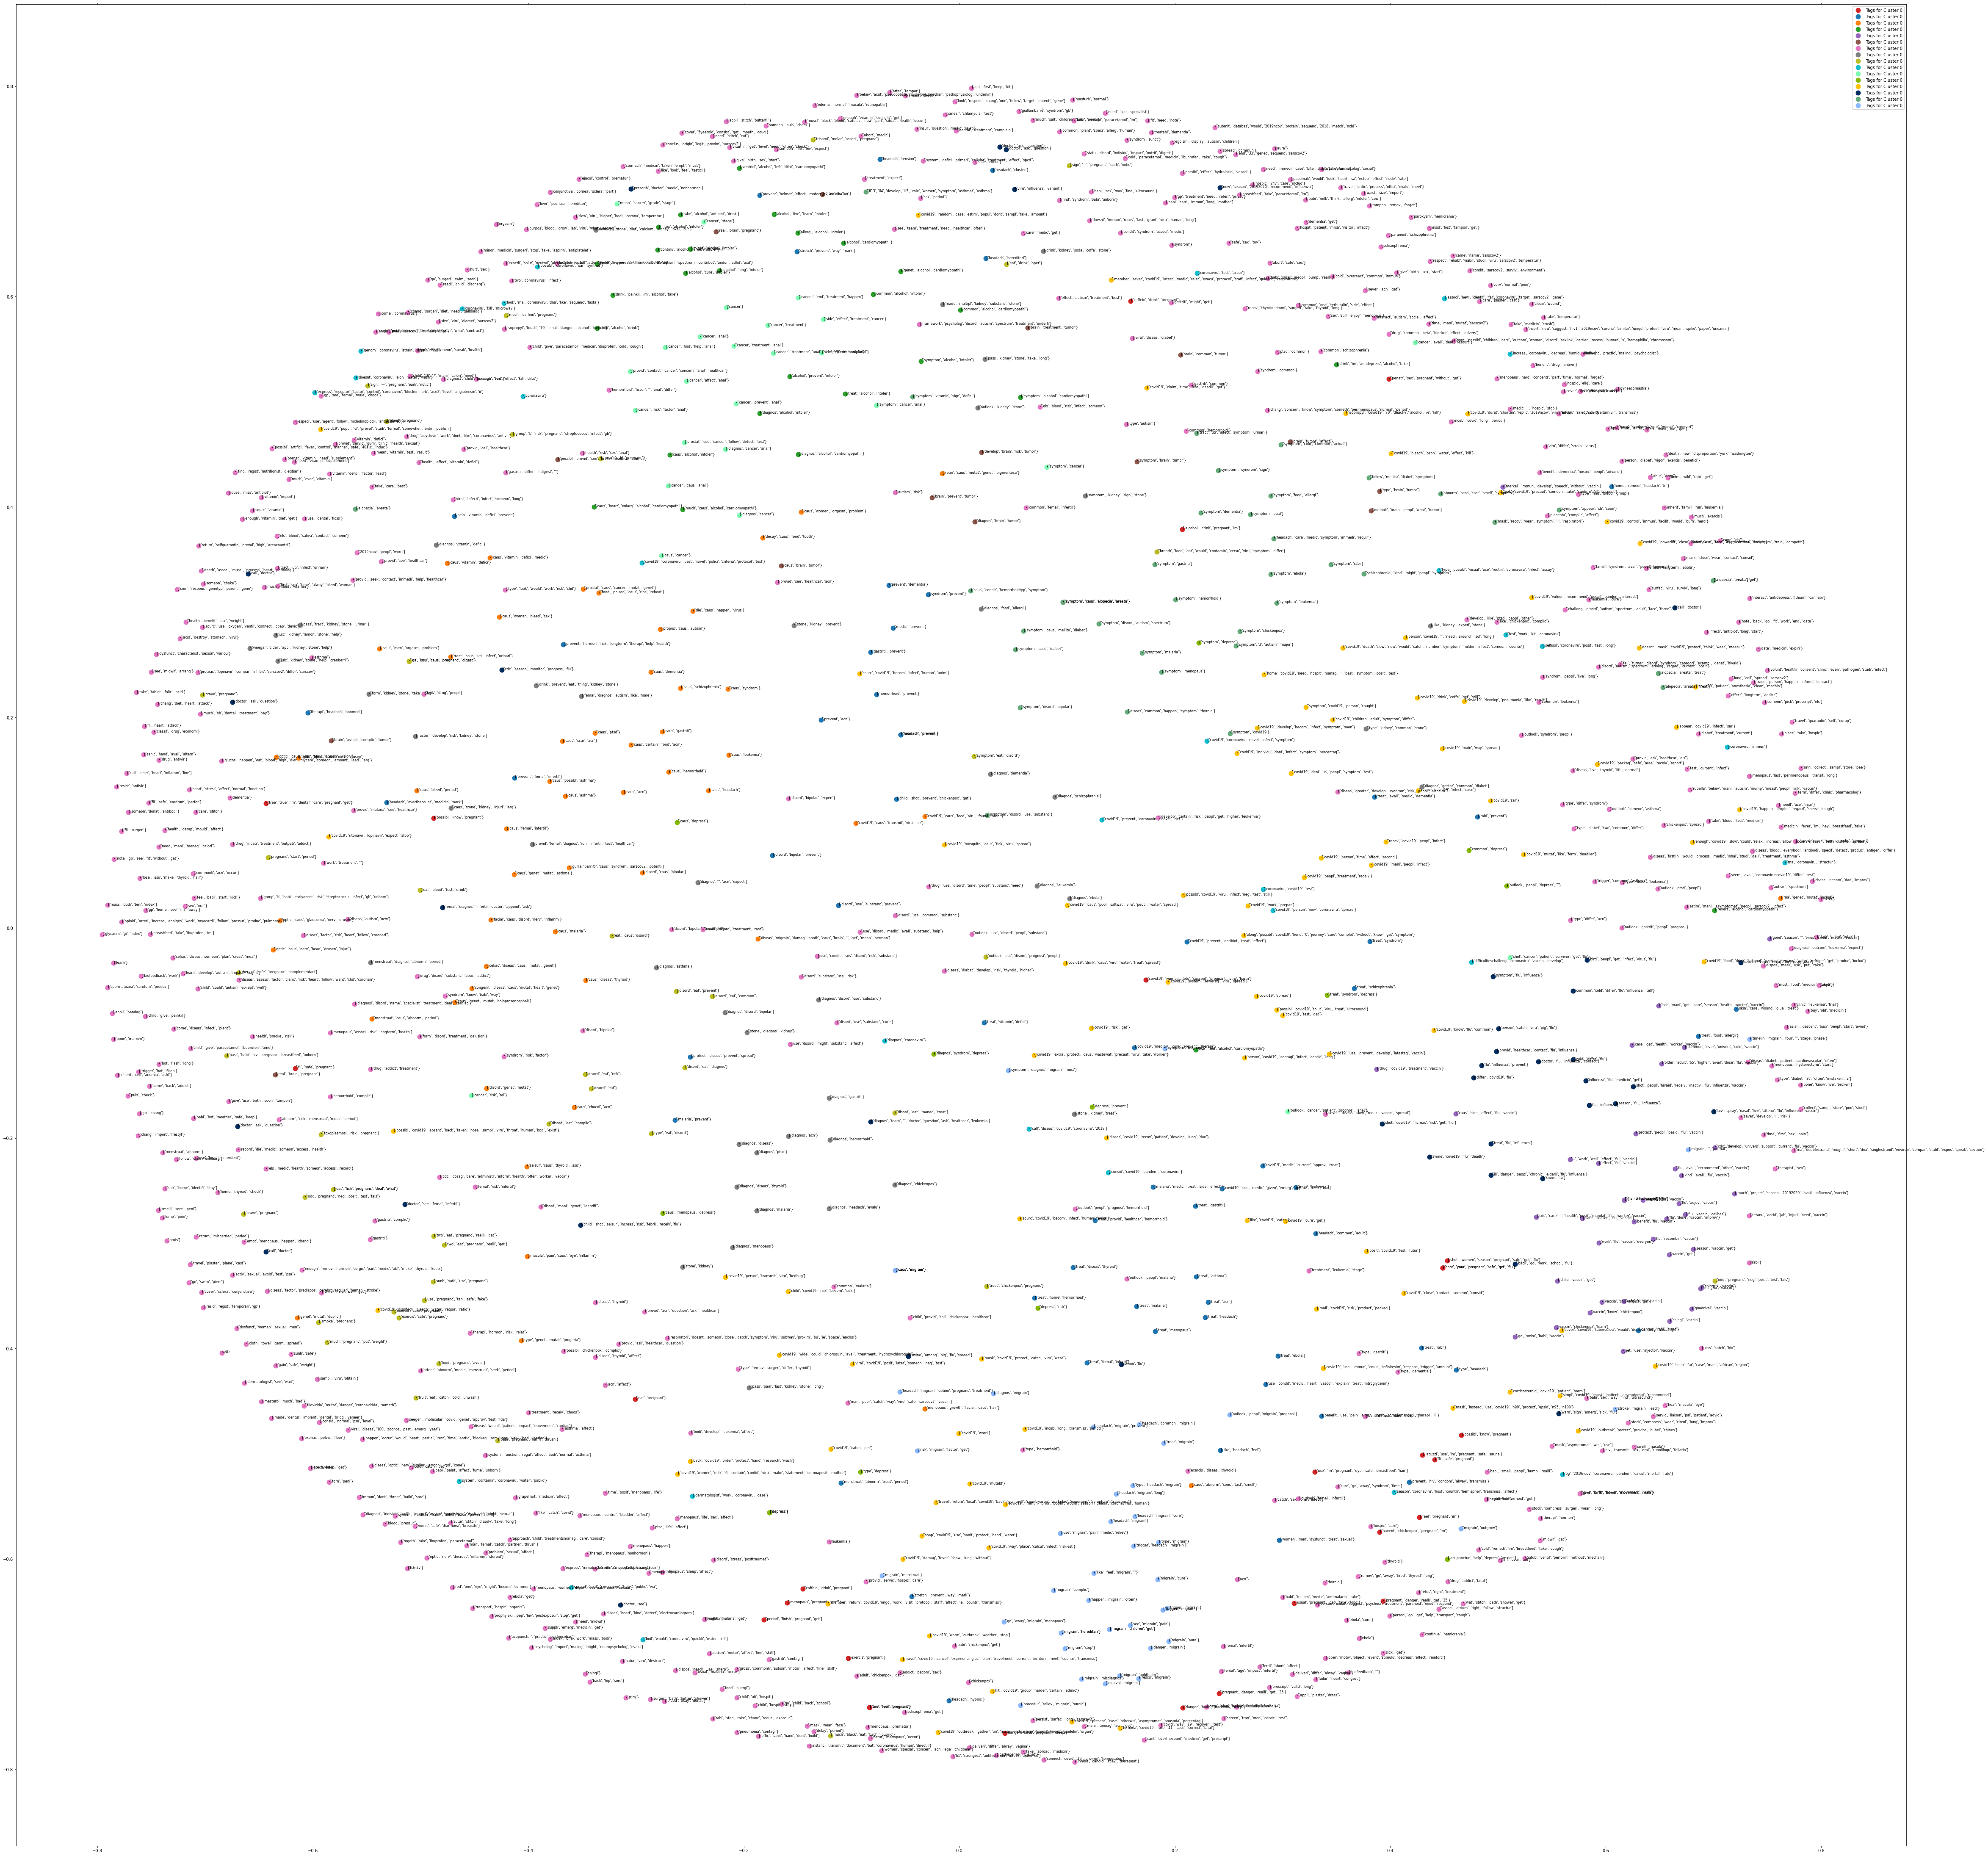

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(xy_df)):
    ax.text(xy_df.loc[i]['x'], xy_df.loc[i]['y'], xy_df.loc[i]['lemmas'], size=8)  

    
    
plt.show() #show the plot